In [8]:
# Import Libraries
import numpy as np 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
import numpy.polynomial.polynomial as poly

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../Proyecto_3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../Proyecto_3/.DS_Store
../Proyecto_3/Proyecto 3.ipynb
../Proyecto_3/input/problem1.csv
../Proyecto_3/.ipynb_checkpoints/Proyecto 3-checkpoint.ipynb


In [9]:
df = pd.read_csv("../Proyecto_3/input/problem1.csv")

In [11]:
print("Dimensiones: ",df.shape)
df.head()

Dimensiones:  (134, 4)


,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611


In [14]:
#Separamos los datos de acuerdo a que son.

X_training = df.X_training
Y_training = df.Y_training
X_test = df.X_test.dropna()
Y_test = df.Y_test.dropna()

Calculamos el error cuadrático y vemos como se ajusta a las dos muestras: con la que entrenamos y con la que testeamos

In [58]:
def calcular_ajuste_cuadrado_del_grado(k):
    model = poly.Polynomial(poly.polyfit(X_training, Y_training, k))
    residuo_cuadratico_test = np.sum((Y_test-model(X_test))**2)
    residuo_cuadratico = np.sum((Y_training-model(X_training))**2)
    return [residuo_cuadratico,residuo_cuadratico_test]

Calculamos hasta el polinomio de grado 133 porque sabemos que apartir de ese grado podemos interpolar los datos y da el traning perfecto

In [48]:
grados = np.arange(0,134,1)
residuos = np.array([calcular_ajuste_cuadrado_del_grado(k) for k in grados])


/Users/muon02/opt/anaconda3/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


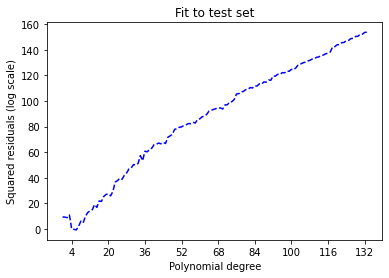

In [154]:
#Para residuos con el conjunto de entrenamiento
plt.plot(grados[:],np.log(residuos[:,0]),'b--')
plt.title("Fit to training set")

#Para residuos con el conjunto de prueba
plt.plot(grados[:],np.log(residuos[:,1]),'b--')
plt.title("Fit to test set")

plt.ylabel('Squared residuals (log scale)')
plt.xlabel('Polynomial degree')
plt.xticks(np.arange(4, 133, step=16))
plt.show()

Obtenemos el mejor resultado segun los datos de entrenamiento (prueba) y vemos el valor

In [170]:
np.where(residuos[:,0]==np.min(residuos[:,0]))
#np.where(residuos[:,1]==np.min(residuos[:,1]))

(array([132]),)

In [71]:
np.min(residuos[:,0])
#np.min(residuos[:,1])

0.5267176892424074

In [93]:
#justificacion de comentario en la respuesta del examen que no hay diferencia en el
#ajuste entre polinimio de 132 y 133
residuos[132,0]-residuos[133,0]

-5.635068026499379e-05

Ahora responderemos lo relativo a la medida AICc

$$
A I C c=n \log \left(\frac{R S S}{n}\right)+\frac{2 m n}{n-m-1}
$$

siendo $n$ el número de datos y $m$ el grado del polinomio más uno.

In [155]:
def calcular_ajuste_AIC_del_grado(k):
    N = len(X_training)
    M = k+1
    model = poly.Polynomial(poly.polyfit(X_training, Y_training, k))
    residuo_cuadratico = np.sum((Y_test-model(X_test))**2)
    AICc = N*np.log10(residuo_cuadratico/N)+ 2*N*M/(N-M-1)
    return AICc

In [156]:
grados_AIC = np.arange(0,132,1)
residuos_AIC = np.array([calcular_ajuste_AIC_del_grado(k) for k in grados_AIC])

/Users/muon02/opt/anaconda3/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


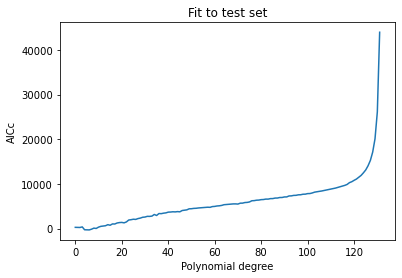

In [162]:
plt.plot(grados_AIC[:],residuos_AIC[:])
plt.title("Fit to test set")
plt.ylabel('AICc')
plt.xlabel('Polynomial degree')
plt.show()

In [158]:
np.where(residuos_AIC==np.min(residuos_AIC))

(array([6]),)

In [159]:
np.min(residuos_AIC)

-307.45171496783865

Hacemos comparativos de que polinomios se ven mejor sobre el conjunto de prueba

/Users/muon02/opt/anaconda3/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


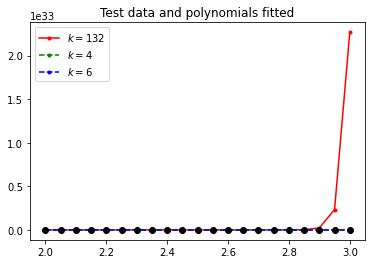

In [168]:
poly1 = poly.Polynomial(poly.polyfit(X_training, Y_training, 132))
poly2 = poly.Polynomial(poly.polyfit(X_training, Y_training, 4))
poly3 = poly.Polynomial(poly.polyfit(X_training, Y_training, 6))


plt.plot(X_test,poly1(X_test),'r.-', label=r'$k=132$')
plt.plot(X_test,poly2(X_test),'g.--', label=r'$k=4$')
plt.plot(X_test,poly3(X_test),'b.--', label=r'$k=6$')
plt.plot(X_test,Y_test,'o',color='black')
plt.legend(loc='best')
plt.title('Test data and polynomials fitted')
plt.show()

